In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#p Define the Rastrigin function (2D)
def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])


In [7]:
# Problem settings
n_dim = 10
bounds = [-5.12, 5.12]

# ES parameters
mu = 5
lambd = 20
generations = 200
sigma = 0.3  # mutation strength


In [9]:
# Initialize parent population
def initialize_population(mu, n_dim, bounds):
    return [np.random.uniform(bounds[0], bounds[1], n_dim) for _ in range(mu)]


In [11]:
# Evolution loop
def evolution_strategy():
    parents = initialize_population(mu, n_dim, bounds)
    best_fitness_over_time = []

    for gen in range(generations):
        # Generate λ offspring
        offspring = []
        for _ in range(lambd):
            # Recombination: mean of μ parents
            x_mean = np.mean(parents, axis=0)
            # Mutation: Gaussian noise
            child = x_mean + sigma * np.random.randn(n_dim)
            # Ensure bounds
            child = np.clip(child, bounds[0], bounds[1])
            offspring.append(child)
        
        # Select best μ from λ offspring
        offspring.sort(key=rastrigin)
        parents = offspring[:mu]

        best_fitness = rastrigin(parents[0])
        best_fitness_over_time.append(best_fitness)
        print(f"Generation {gen}: Best Fitness = {best_fitness:.4f}")

    return parents[0], best_fitness_over_time


Generation 0: Best Fitness = 96.7293
Generation 1: Best Fitness = 103.0256
Generation 2: Best Fitness = 95.0798
Generation 3: Best Fitness = 88.7861
Generation 4: Best Fitness = 76.9742
Generation 5: Best Fitness = 69.0203
Generation 6: Best Fitness = 93.4033
Generation 7: Best Fitness = 87.6122
Generation 8: Best Fitness = 81.5492
Generation 9: Best Fitness = 97.9929
Generation 10: Best Fitness = 74.4330
Generation 11: Best Fitness = 94.9935
Generation 12: Best Fitness = 99.2758
Generation 13: Best Fitness = 85.8069
Generation 14: Best Fitness = 101.4755
Generation 15: Best Fitness = 75.5373
Generation 16: Best Fitness = 91.9755
Generation 17: Best Fitness = 106.8326
Generation 18: Best Fitness = 69.6232
Generation 19: Best Fitness = 100.1723
Generation 20: Best Fitness = 86.7930
Generation 21: Best Fitness = 81.1313
Generation 22: Best Fitness = 78.2953
Generation 23: Best Fitness = 99.8556
Generation 24: Best Fitness = 90.3587
Generation 25: Best Fitness = 77.0136
Generation 26: Bes

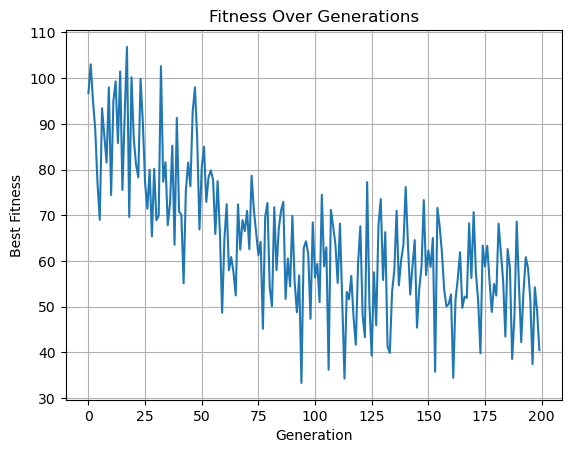

In [13]:
best_solution, fitness_curve = evolution_strategy()

# Plot convergence
plt.plot(fitness_curve)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid()
plt.show()
